# Paper Figures Generation
This notebook contains the code to generate the figures used in the CaVL-Doc paper.
The figures are saved to `../docs/assets/` with high resolution (600 DPI) and adjusted font sizes.

In [3]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from matplotlib.patches import FancyBboxPatch
import numpy as np
import os

# --- Global Configuration for Paper Figures ---
# Set font sizes and family for IEEE/Academic style
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.size'] = 14
plt.rcParams['axes.titlesize'] = 16
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
plt.rcParams['legend.fontsize'] = 12

# Output directory
OUTPUT_DIR = '../docs/assets/'
os.makedirs(OUTPUT_DIR, exist_ok=True)

print(f"Output directory set to: {os.path.abspath(OUTPUT_DIR)}")

Output directory set to: /home/joaopaulo/Projects/CaVL-Doc/docs/assets


Saved metric_space to ../docs/assets/


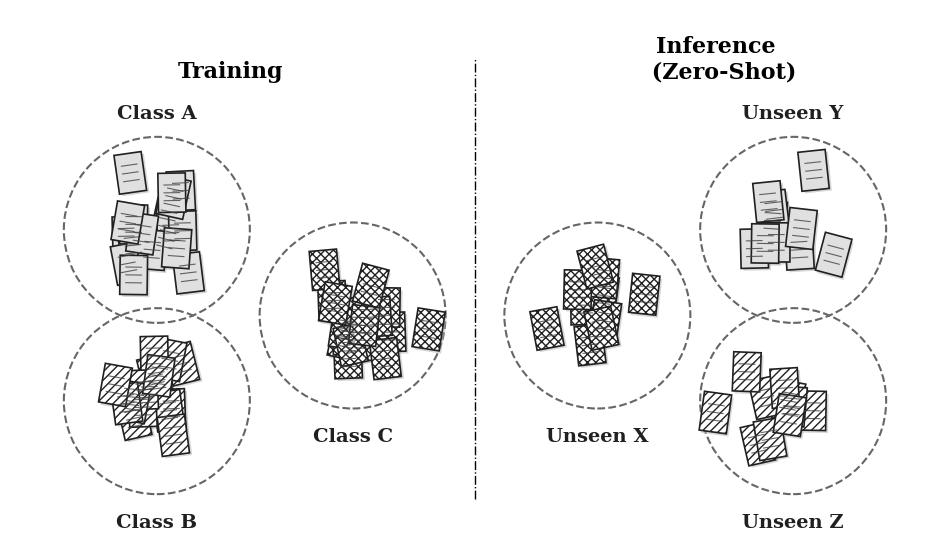

In [4]:
# --- Figure 1: Metric Space Visualization (Symmetric) ---

def draw_technical_document_icon(ax, x, y, size=0.8, edgecolor='black', facecolor='white', hatch=None, angle=0):
    """
    Desenha ícone vetorial de documento em estilo técnico (escala de cinza/hachurado).
    Aceita parâmetros de 'hatch' para diferenciar classes.
    """
    t = plt.matplotlib.transforms.Affine2D().rotate_deg_around(x, y, angle) + ax.transData
    width = size * 0.7; height = size
    
    # Sombra (Mantida em cinza simples para profundidade)
    ax.add_patch(patches.Rectangle((x - width/2 + 0.05, y - height/2 - 0.05), width, height,
                                   linewidth=0, facecolor='#b0b0b0', transform=t, zorder=9, alpha=0.5))
    
    # Corpo do Documento (Usa edgecolor, facecolor e hatch)
    # lw (linewidth) aumentado ligeiramente para clareza em P&B
    doc_body = patches.Rectangle((x - width/2, y - height/2), width, height,
                                 linewidth=1.2, edgecolor=edgecolor, facecolor=facecolor,
                                 hatch=hatch, transform=t, zorder=10)
    ax.add_patch(doc_body)
    
    # Linhas internas (Sempre cinza escuro para contraste técnico)
    line_spacing = height / 5
    inner_line_color = '#404040'
    for i in range(1, 4):
        ly = y + height/2 - (i * line_spacing) - (height * 0.1)
        ax.add_line(plt.Line2D([x - width/3.5, x + width/3.5], [ly, ly],
                               color=inner_line_color, linewidth=0.8, alpha=0.8, transform=t, zorder=11))

def plot_technical_symmetric_metric_space():
    # Aspect ratio ajustado para acomodar a largura extra da simetria
    fig, ax = plt.subplots(figsize=(12, 7.5))
    np.random.seed(103)
    
    # --- ZONAS E TÍTULOS ---
    divider_x = 9.5
    
    # Títulos em PRETO
    ax.text(4.5, 8.5, "Training",
            ha='center', va='bottom', fontsize=16, fontweight='bold', color='black')

    ax.text(14.5, 8.5, "Inference \n (Zero-Shot)",
            ha='center', va='bottom', fontsize=16, fontweight='bold', color='black')

    # Linha Divisória Centrada (Estilo mais técnico: dashdot)
    ax.vlines(divider_x, 0, 9.0, colors='black', linestyles='dashdot', linewidth=1.0)

    # --- DEFINIÇÃO DE ESTILOS TÉCNICOS (Escala de Cinza e Hachuras) ---
    # Formato: (edgecolor, facecolor, hatch_pattern)
    
    style_solid_dark = ('#202020', '#e0e0e0', None)      # Borda escura, fundo cinza claro, liso
    style_diag_hatch = ('#202020', 'white', '////')      # Hachura diagonal densa
    style_cross_hatch = ('#202020', 'white', 'xxxx')     # Hachura cruzada

    # Estilo dos Halos (Círculos de margem)
    halo_style = {'facecolor': 'none', 'edgecolor': '#666666', 'linestyle': '--', 'linewidth': 1.5}

    # --- DADOS DOS CLUSTERS ---
    
    # TREINO
    train_centers = [(3.0, 5.5), (3.0, 2.0), (7.0, 3.75)]
    train_styles = [style_solid_dark, style_diag_hatch, style_cross_hatch]
    train_labels = ['Class A', 'Class B', 'Class C']

    # INFERÊNCIA
    infer_centers = [(16.0, 5.5), (16.0, 2.0), (12.0, 3.75)]
    infer_styles = [style_solid_dark, style_diag_hatch, style_cross_hatch]
    infer_labels = ['Unseen Y', 'Unseen Z', 'Unseen X']

    margin_radius = 1.9
    spread = 0.5
    n_samples = 18

    label_color = '#202020' # Cinza quase preto para texto

    # --- LOOP TREINO ---
    for center, style, label in zip(train_centers, train_styles, train_labels):
        edge, face, hatch = style
        
        # Desenha Halo Técnico (Tracejado)
        ax.add_patch(patches.Circle(center, margin_radius, **halo_style, zorder=0))
        
        # Desenha Ícones
        for px, py in np.random.normal(center, spread, (n_samples, 2)):
            draw_technical_document_icon(ax, px, py, edgecolor=edge, facecolor=face, hatch=hatch,
                                         angle=np.random.uniform(-15, 15))
        
        # Rótulos
        if center[1] > 5.0:
            ax.text(center[0], center[1] + 2.2, label, ha='center', va='bottom', 
                    color=label_color, fontweight='bold', fontsize=14)
        else:
            ax.text(center[0], center[1] - 2.3, label, ha='center', va='top', 
                    color=label_color, fontweight='bold', fontsize=14)

    # --- LOOP INFERÊNCIA ---
    for center, style, label in zip(infer_centers, infer_styles, infer_labels):
        edge, face, hatch = style
        
        # Desenha Halo Técnico
        ax.add_patch(patches.Circle(center, margin_radius, **halo_style, zorder=0))
        
        # Desenha Ícones (menos amostras para unseen)
        for px, py in np.random.normal(center, spread, (10, 2)):
            draw_technical_document_icon(ax, px, py, edgecolor=edge, facecolor=face, hatch=hatch,
                                         angle=np.random.uniform(-15, 15))
            
        # Rótulos
        if center[1] > 5.0:
            ax.text(center[0], center[1] + 2.2, label, ha='center', va='bottom', 
                    color=label_color, fontweight='bold', fontsize=14)
        else:
            ax.text(center[0], center[1] - 2.3, label, ha='center', va='top', 
                    color=label_color, fontweight='bold', fontsize=14)

    # Ajustes Finais
    ax.set_xlim(0, 19) # Expandido levemente para caber a simetria
    ax.set_ylim(-1.0, 10.0) 
    ax.set_aspect('equal')
    ax.axis('off')
    
    filename = 'metric_space'
    
    # Save PDF
    pdf_path = os.path.join(OUTPUT_DIR, f'{filename}.pdf')
    plt.savefig(pdf_path, bbox_inches='tight', pad_inches=0.05)
    
    # Save PNG (High Res)
    png_path = os.path.join(OUTPUT_DIR, f'{filename}.png')
    plt.savefig(png_path, dpi=600, bbox_inches='tight', pad_inches=0.05)
    
    print(f"Saved {filename} to {OUTPUT_DIR}")
    plt.show()

plot_technical_symmetric_metric_space()

Saved architecture_overview to ../docs/assets/


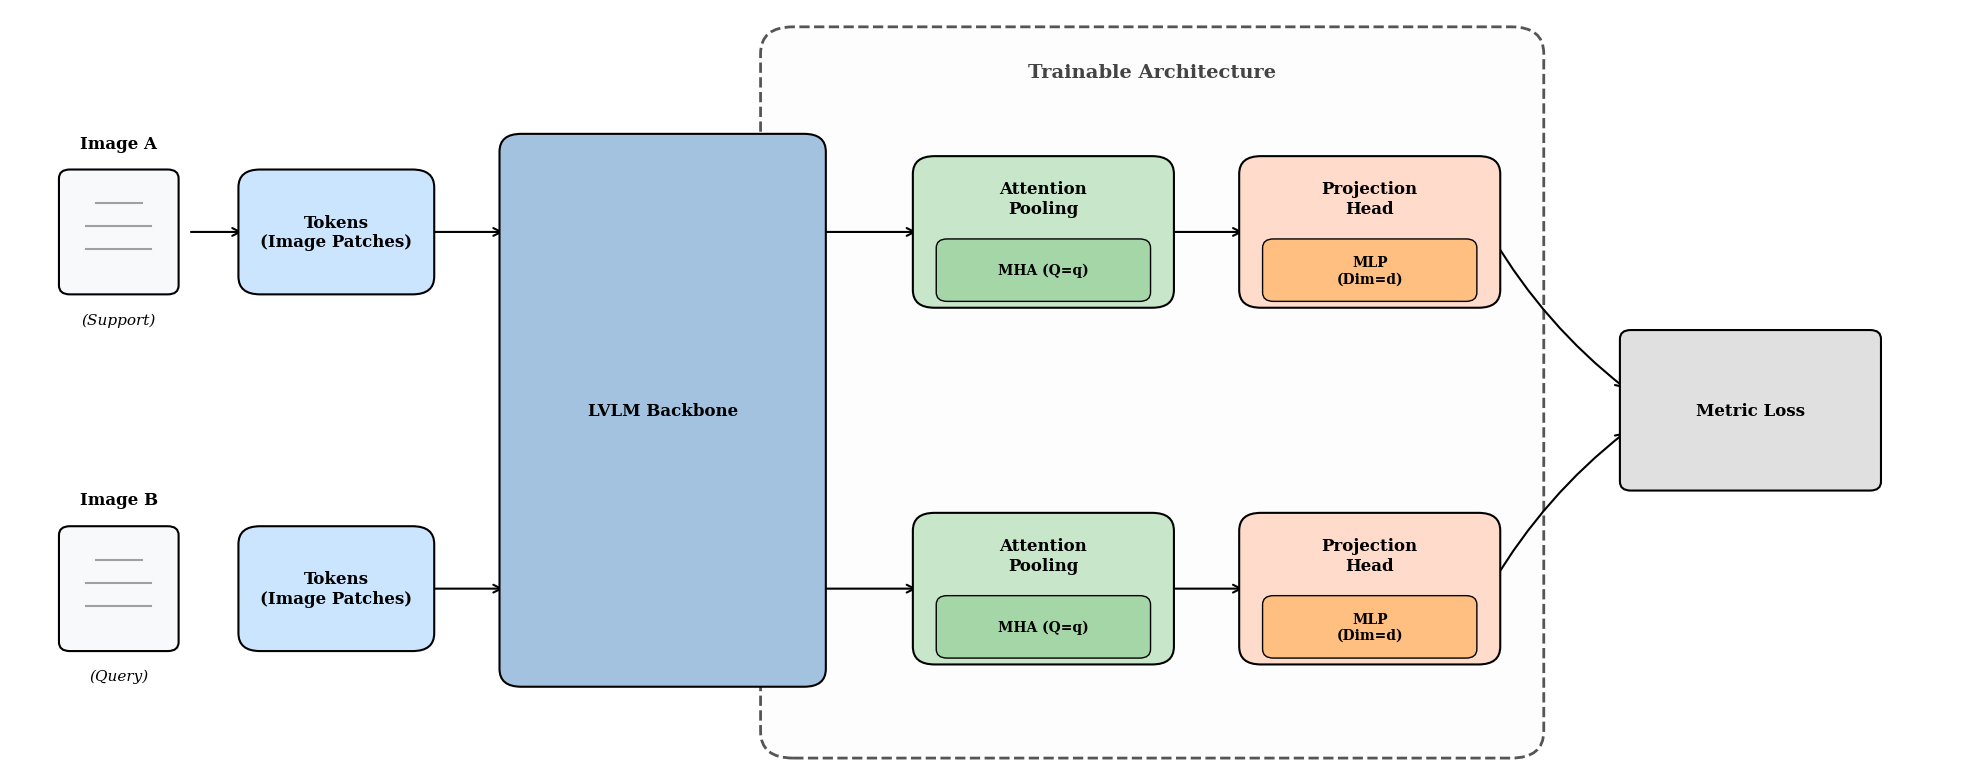

In [6]:
# --- Figure 2: Architecture Overview ---

def draw_doc_icon(ax, xy, width=1.0, height=1.3, label_top="", label_bot=""):
    """Desenha ícone vetorial de documento."""
    doc = FancyBboxPatch((xy[0]-width/2, xy[1]-height/2), width, height,
                         boxstyle="round,pad=0.05,rounding_size=0.1",
                         ec="black", fc='#f8f9fa', lw=1.5, zorder=10)
    ax.add_patch(doc)
    
    # Linhas de texto
    line_w = width * 0.6
    start_y = xy[1] + height * 0.25
    spacing = height * 0.2
    for i in range(3):
        ly = start_y - (i * spacing)
        current_lw = line_w * 0.7 if i == 0 else line_w 
        ax.plot([xy[0] - current_lw/2, xy[0] + current_lw/2], [ly, ly], 
                color='#a0a0a0', lw=1.5, zorder=11)

    if label_top:
        ax.text(xy[0], xy[1] + height/2 + 0.25, label_top, ha='center', va='bottom', 
                fontweight='bold', fontsize=12)
    if label_bot:
        ax.text(xy[0], xy[1] - height/2 - 0.25, label_bot, ha='center', va='top', 
                fontsize=11, style='italic')

def draw_functional_block(ax, xy, w, h, title, main_color, sub_text=None, sub_color='white'):
    """Desenha blocos funcionais (Pooling, Projection, Backbone)."""
    box = FancyBboxPatch((xy[0]-w/2, xy[1]-h/2), w, h, 
                         boxstyle="round,pad=0.1,rounding_size=0.2", 
                         ec="black", fc=main_color, lw=1.5, zorder=15)
    ax.add_patch(box)
    
    title_y_offset = h/4 if sub_text else 0
    ax.text(xy[0], xy[1] + title_y_offset, title, ha='center', va='center', 
            fontweight='bold', fontsize=12, zorder=16)
    
    if sub_text:
        sub_h = h * 0.4; sub_w = w * 0.85
        sub_xy = (xy[0], xy[1] - h/3.5)
        sub_box = FancyBboxPatch((sub_xy[0]-sub_w/2, sub_xy[1]-sub_h/2), sub_w, sub_h, 
                                 boxstyle="round,pad=0.05,rounding_size=0.1", 
                                 ec="black", fc=sub_color, lw=1, zorder=16)
        ax.add_patch(sub_box)
        ax.text(sub_xy[0], sub_xy[1], sub_text, ha='center', va='center', 
                fontsize=10, fontweight='bold', zorder=17)

def draw_arrow(ax, p1, p2, style="->", lw=1.5, connectionstyle="arc3"):
    ax.annotate("", xy=p2, xytext=p1, 
                arrowprops=dict(arrowstyle=style, lw=lw, color="black", 
                                shrinkA=5, shrinkB=5, connectionstyle=connectionstyle),
                zorder=5)

def plot_architecture_overview():
    # --- Configuração do Plot ---
    fig, ax = plt.subplots(figsize=(20, 8)) # Increased size slightly
    ax.set_xlim(0, 18) 
    ax.set_ylim(0, 8.5)
    ax.axis('off')

    # Cores (Conforme solicitado)
    c_tok = '#cce5ff'
    c_back = '#a3c2e0'
    c_pool = '#C8E6C9'; c_mha = '#A5D6A7' # Tons de verde
    c_proj = '#ffdbcc'; c_mlp = '#ffbf80'
    c_loss = '#e0e0e0'
    c_train_bg = "#fdfdfd" 

    # Grid Layout
    y_top = 6.0
    y_bot = 2.0
    y_mid = 4.0

    x_doc = 1.0
    x_tok = 3.0
    x_back = 6.0
    x_pool = 9.5
    x_proj = 12.5
    x_loss = 16.0 

    # --- 1. GRANDE QUADRO TRAINABLE ---
    train_x_start = x_back + 1.0
    train_x_end = x_proj + 1.5
    train_y_start = y_bot - 1.8
    train_y_end = y_top + 2.2
    train_width = train_x_end - train_x_start
    train_height = train_y_end - train_y_start

    train_frame = FancyBboxPatch((train_x_start, train_y_start), train_width, train_height,
                                 boxstyle="round,pad=0.1,rounding_size=0.3",
                                 ec="#555555", fc=c_train_bg, lw=2, ls='--', zorder=1)
    ax.add_patch(train_frame)

    ax.text(train_x_start + train_width/2, train_y_end - 0.3, "Trainable Architecture", 
            ha='center', va='top', fontsize=14, fontweight='bold', color='#444444', zorder=2)

    # --- 2. Componentes Funcionais ---

    # Entradas
    draw_doc_icon(ax, (x_doc, y_top), label_top="Image A", label_bot="(Support)")
    draw_doc_icon(ax, (x_doc, y_bot), label_top="Image B", label_bot="(Query)")

    # Tokens
    draw_functional_block(ax, (x_tok, y_top), 1.6, 1.2, "Tokens\n(Image Patches)", c_tok)
    draw_functional_block(ax, (x_tok, y_bot), 1.6, 1.2, "Tokens\n(Image Patches)", c_tok)

    # Backbone
    back_h = y_top - y_bot + 2.0
    draw_functional_block(ax, (x_back, y_mid), 2.8, back_h, "LVLM Backbone", c_back)

    # Pooling
    draw_functional_block(ax, (x_pool, y_top), 2.2, 1.5, "Attention\nPooling", c_pool, "MHA (Q=q)", c_mha)
    draw_functional_block(ax, (x_pool, y_bot), 2.2, 1.5, "Attention\nPooling", c_pool, "MHA (Q=q)", c_mha)

    # Projection
    draw_functional_block(ax, (x_proj, y_top), 2.2, 1.5, "Projection\nHead", c_proj, "MLP\n(Dim=d)", c_mlp)
    draw_functional_block(ax, (x_proj, y_bot), 2.2, 1.5, "Projection\nHead", c_proj, "MLP\n(Dim=d)", c_mlp)

    # Metric Loss
    loss_box = FancyBboxPatch((x_loss-1.1, y_mid-0.8), 2.2, 1.6, boxstyle="round,pad=0.1", ec="black", fc=c_loss, lw=1.5, zorder=15)
    ax.add_patch(loss_box)
    ax.text(x_loss, y_mid, "Metric Loss", ha='center', va='center', fontweight='bold', fontsize=12, zorder=16)

    # --- 4. Conexões ---

    # Doc -> Tokens
    draw_arrow(ax, (x_doc+0.6, y_top), (x_tok-0.8, y_top))

    # Tokens -> Backbone
    draw_arrow(ax, (x_tok+0.8, y_top), (x_back-1.4, y_top))
    draw_arrow(ax, (x_tok+0.8, y_bot), (x_back-1.4, y_bot))

    # Backbone -> Pooling
    draw_arrow(ax, (x_back+1.4, y_top), (x_pool-1.1, y_top))
    draw_arrow(ax, (x_back+1.4, y_bot), (x_pool-1.1, y_bot))

    # Pooling -> Projection
    draw_arrow(ax, (x_pool+1.1, y_top), (x_proj-1.1, y_top))
    draw_arrow(ax, (x_pool+1.1, y_bot), (x_proj-1.1, y_bot))

    # Projection -> Metric Loss
    draw_arrow(ax, (x_proj+1.1, y_top), (x_loss-1.1, y_mid+0.2), connectionstyle="arc3,rad=0.1")
    draw_arrow(ax, (x_proj+1.1, y_bot), (x_loss-1.1, y_mid-0.2), connectionstyle="arc3,rad=-0.1")

    plt.tight_layout()

    # --- SALVANDO A IMAGEM ---
    filename = 'architecture_overview'
    
    # Save PDF
    pdf_path = os.path.join(OUTPUT_DIR, f'{filename}.pdf')
    plt.savefig(pdf_path, bbox_inches='tight', pad_inches=0.05)
    
    # Save PNG (High Res)
    png_path = os.path.join(OUTPUT_DIR, f'{filename}.png')
    plt.savefig(png_path, dpi=600, bbox_inches='tight', pad_inches=0.05)
    
    print(f"Saved {filename} to {OUTPUT_DIR}")
    plt.show()

plot_architecture_overview()

Saved architecture_with_teacher to ../docs/assets/


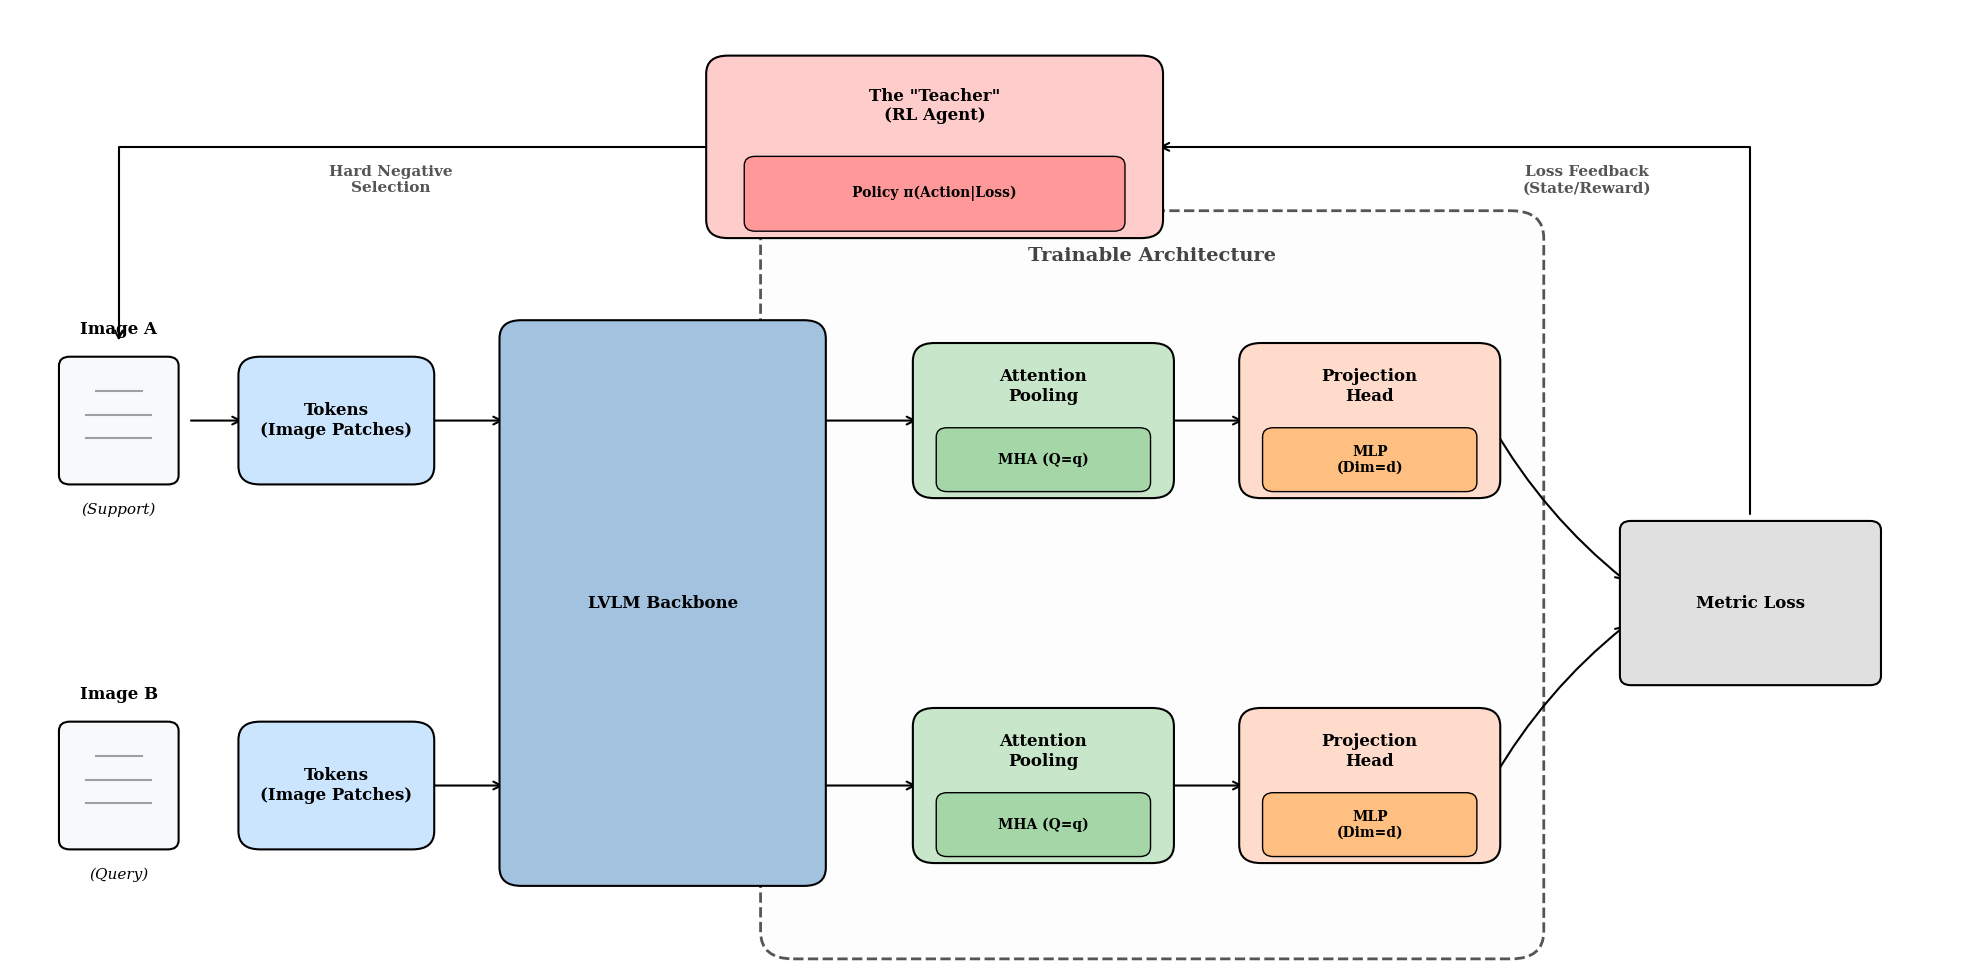

In [7]:
# --- Figure 2 (Revised): Architecture Overview with Teacher Agent ---

def plot_architecture_with_teacher():
    # --- Configuração do Plot ---
    fig, ax = plt.subplots(figsize=(20, 10)) # Increased height for Teacher
    ax.set_xlim(0, 18) 
    ax.set_ylim(0, 10.5) # Increased Y limit
    ax.axis('off')

    # Cores
    c_tok = '#cce5ff'
    c_back = '#a3c2e0'
    c_pool = '#C8E6C9'; c_mha = '#A5D6A7' 
    c_proj = '#ffdbcc'; c_mlp = '#ffbf80'
    c_loss = '#e0e0e0'
    c_train_bg = "#fdfdfd" 
    c_teacher = '#ffcccc'; c_policy = '#ff9999' # Red/Pink for Teacher

    # Grid Layout
    y_top = 6.0
    y_bot = 2.0
    y_mid = 4.0
    
    # Teacher Y position
    y_teacher = 9.0

    x_doc = 1.0
    x_tok = 3.0
    x_back = 6.0
    x_pool = 9.5
    x_proj = 12.5
    x_loss = 16.0 
    x_teacher = 8.5 # Centered roughly for feedback loop

    # --- 1. GRANDE QUADRO TRAINABLE ---
    train_x_start = x_back + 1.0
    train_x_end = x_proj + 1.5
    train_y_start = y_bot - 1.8
    train_y_end = y_top + 2.2
    train_width = train_x_end - train_x_start
    train_height = train_y_end - train_y_start

    train_frame = FancyBboxPatch((train_x_start, train_y_start), train_width, train_height,
                                 boxstyle="round,pad=0.1,rounding_size=0.3",
                                 ec="#555555", fc=c_train_bg, lw=2, ls='--', zorder=1)
    ax.add_patch(train_frame)

    ax.text(train_x_start + train_width/2, train_y_end - 0.3, "Trainable Architecture", 
            ha='center', va='top', fontsize=14, fontweight='bold', color='#444444', zorder=2)

    # --- 2. Componentes Funcionais (Standard Pipeline) ---

    # Entradas
    draw_doc_icon(ax, (x_doc, y_top), label_top="Image A", label_bot="(Support)")
    draw_doc_icon(ax, (x_doc, y_bot), label_top="Image B", label_bot="(Query)")

    # Tokens
    draw_functional_block(ax, (x_tok, y_top), 1.6, 1.2, "Tokens\n(Image Patches)", c_tok)
    draw_functional_block(ax, (x_tok, y_bot), 1.6, 1.2, "Tokens\n(Image Patches)", c_tok)

    # Backbone
    back_h = y_top - y_bot + 2.0
    draw_functional_block(ax, (x_back, y_mid), 2.8, back_h, "LVLM Backbone", c_back)

    # Pooling
    draw_functional_block(ax, (x_pool, y_top), 2.2, 1.5, "Attention\nPooling", c_pool, "MHA (Q=q)", c_mha)
    draw_functional_block(ax, (x_pool, y_bot), 2.2, 1.5, "Attention\nPooling", c_pool, "MHA (Q=q)", c_mha)

    # Projection
    draw_functional_block(ax, (x_proj, y_top), 2.2, 1.5, "Projection\nHead", c_proj, "MLP\n(Dim=d)", c_mlp)
    draw_functional_block(ax, (x_proj, y_bot), 2.2, 1.5, "Projection\nHead", c_proj, "MLP\n(Dim=d)", c_mlp)

    # Metric Loss
    loss_box = FancyBboxPatch((x_loss-1.1, y_mid-0.8), 2.2, 1.6, boxstyle="round,pad=0.1", ec="black", fc=c_loss, lw=1.5, zorder=15)
    ax.add_patch(loss_box)
    ax.text(x_loss, y_mid, "Metric Loss", ha='center', va='center', fontweight='bold', fontsize=12, zorder=16)

    # --- 3. TEACHER COMPONENT (New) ---
    draw_functional_block(ax, (x_teacher, y_teacher), 4.0, 1.8, 'The "Teacher"\n(RL Agent)', c_teacher, "Policy π(Action|Loss)", c_policy)

    # --- 4. Conexões Pipeline ---

    # Doc -> Tokens
    draw_arrow(ax, (x_doc+0.6, y_top), (x_tok-0.8, y_top))
    
    # Tokens -> Backbone
    draw_arrow(ax, (x_tok+0.8, y_top), (x_back-1.4, y_top))
    draw_arrow(ax, (x_tok+0.8, y_bot), (x_back-1.4, y_bot))

    # Backbone -> Pooling
    draw_arrow(ax, (x_back+1.4, y_top), (x_pool-1.1, y_top))
    draw_arrow(ax, (x_back+1.4, y_bot), (x_pool-1.1, y_bot))

    # Pooling -> Projection
    draw_arrow(ax, (x_pool+1.1, y_top), (x_proj-1.1, y_top))
    draw_arrow(ax, (x_pool+1.1, y_bot), (x_proj-1.1, y_bot))

    # Projection -> Metric Loss
    draw_arrow(ax, (x_proj+1.1, y_top), (x_loss-1.1, y_mid+0.2), connectionstyle="arc3,rad=0.1")
    draw_arrow(ax, (x_proj+1.1, y_bot), (x_loss-1.1, y_mid-0.2), connectionstyle="arc3,rad=-0.1")

    # --- 5. Conexões Teacher (The Loop) ---
    
    # Metric Loss -> Teacher (State/Reward)
    # Start from top of Loss box, go to right side of Teacher? No, Teacher is centered at 8.5. Loss is at 16.0.
    # Teacher is to the LEFT of Loss.
    # Path: Up from Loss, then Left to Teacher.
    draw_arrow(ax, (x_loss, y_mid+0.9), (x_teacher+2.0, y_teacher), style="->", connectionstyle="angle,angleA=90,angleB=0")
    ax.text(14.5, 8.5, "Loss Feedback\n(State/Reward)", ha='center', fontsize=11, fontweight='bold', color='#555')

    # Teacher -> Input (Action: Data Selection)
    # Teacher is at 8.5. Docs are at 1.0. 
    # Path: Left from Teacher, then Down to Docs.
    draw_arrow(ax, (x_teacher-2.0, y_teacher), (x_doc, y_top+0.8), style="->", connectionstyle="angle,angleA=180,angleB=90")
    ax.text(3.5, 8.5, "Hard Negative\nSelection", ha='center', fontsize=11, fontweight='bold', color='#555')

    plt.tight_layout()

    # --- SALVANDO A IMAGEM ---
    filename = 'architecture_with_teacher'
    
    # Save PDF
    pdf_path = os.path.join(OUTPUT_DIR, f'{filename}.pdf')
    plt.savefig(pdf_path, bbox_inches='tight', pad_inches=0.05)
    
    # Save PNG (High Res)
    png_path = os.path.join(OUTPUT_DIR, f'{filename}.png')
    plt.savefig(png_path, dpi=600, bbox_inches='tight', pad_inches=0.05)
    
    print(f"Saved {filename} to {OUTPUT_DIR}")
    plt.show()

plot_architecture_with_teacher()

Saved teaser_fig to ../docs/assets/


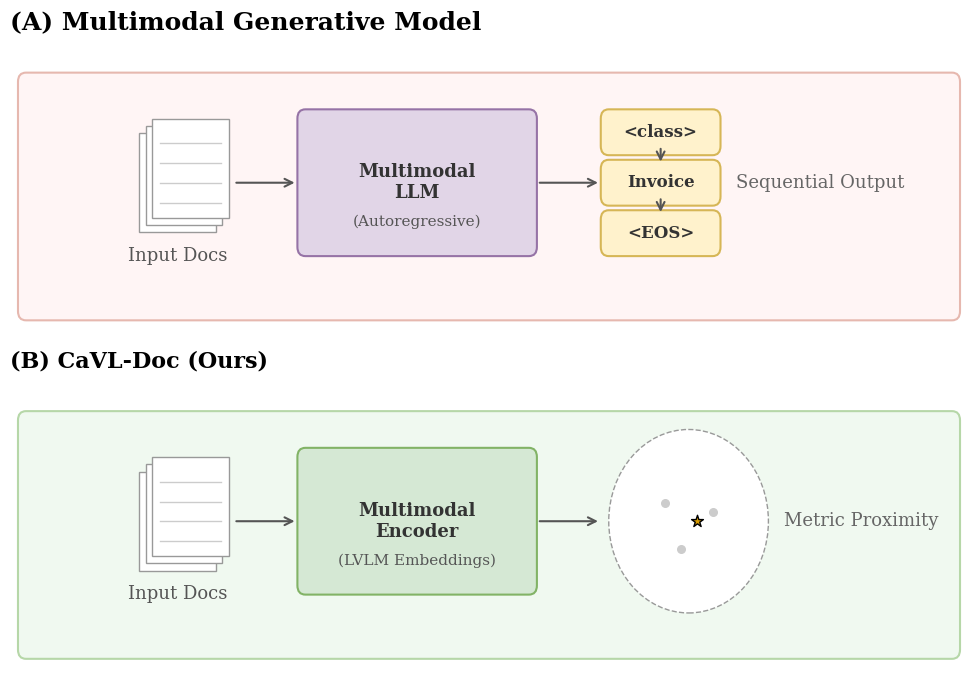

In [16]:
# --- Figure 3: Teaser Figure (Aligned) ---

def draw_aligned_figure():
    # Vertical Alignment: 2 Rows, 1 Column
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 7)) # Increased size
    plt.subplots_adjust(hspace=0.4, top=0.95, bottom=0.05, left=0.02, right=0.98)

    # Styles
    COLOR_BG_GEN = '#fff5f5'   # Faint Red/Warm
    COLOR_BG_OURS = '#f0f9f0'  # Faint Green/Cool
    COLOR_BORDER_GEN = '#e6b8af'
    COLOR_BORDER_OURS = '#b6d7a8'
    
    COLOR_MODEL_GEN = {'face': '#e1d5e7', 'edge': '#9673a6'} # Purple
    COLOR_MODEL_OURS = {'face': '#d5e8d4', 'edge': '#82b366'} # Green
    
    FONT_SIZE_BODY = 14 # Increased font size from 12

    def draw_box(ax, x, y, w, h, text, style, subtext=None, alpha=1.0, zorder=2, fontsize=None):
        if fontsize is None: fontsize = FONT_SIZE_BODY
        box = patches.FancyBboxPatch((x, y), w, h, boxstyle="round,pad=0.1", 
                                     linewidth=1.5, edgecolor=style['edge'], facecolor=style['face'], 
                                     alpha=alpha, zorder=zorder)
        ax.add_patch(box)
        ax.text(x + w/2, y + h/2, text, ha='center', va='center', 
                fontsize=fontsize, fontweight='bold', color='#333333', zorder=zorder+1)
        if subtext:
             ax.text(x + w/2, y + h/2 - 0.35, subtext, ha='center', va='top', 
                     fontsize=fontsize-2, color='#555555', zorder=zorder+1)
        return box

    def draw_arrow(ax, start, end, color='#555555'):
        ax.annotate("", xy=end, xytext=start, arrowprops=dict(arrowstyle="->", lw=1.5, color=color))

    def draw_doc_stack(ax, x, y, w, h):
        # Draw a stack of 3 documents within rectangular bounds w,h
        # Center it visually around x + w/2
        doc_w, doc_h = w * 0.8, h * 0.9
        start_x = x + (w - doc_w)/2
        start_y = y + (h - doc_h)/2
        
        for i in range(3):
            offset = i * 0.08
            rect = patches.Rectangle((start_x + offset, start_y + offset), doc_w, doc_h, linewidth=1, edgecolor='#999', facecolor='white', zorder=2+i)
            ax.add_patch(rect)
            for line_y in [0.75, 0.55, 0.35, 0.15]:
                ax.plot([start_x + offset + 0.1, start_x + offset + doc_w - 0.1], 
                        [start_y + offset + line_y*doc_h, start_y + offset + line_y*doc_h], color='#ccc', lw=1, zorder=3+i)
        ax.text(x + w/2, y - 0.25, "Input Docs", ha='center', fontsize=13, color='#555') # Increased from 11

    # ==========================================
    # Layout Logic
    # ==========================================
    # We define X standard positions to ensure perfect alignments
    # Total width approx 12 units
    
    X_START = 1.5
    W_DOC = 1.2
    GAP_1 = 1.0
    W_MODEL = 2.8
    GAP_2 = 1.0
    X_OUTPUT = X_START + W_DOC + GAP_1 + W_MODEL + GAP_2 # Start of output section
    
    Y_CENTER_A = 1.6
    Y_CENTER_B = 1.6
    
    # ==========================================
    # PANEL A: Generative Model
    # ==========================================
    ax1.set_xlim(0, 12)
    ax1.set_ylim(0, 3.2)
    ax1.axis('off')
    
    # Container
    container_a = patches.FancyBboxPatch((0.2, 0.2), 11.6, 2.5, boxstyle="round,pad=0.1", 
                                         linewidth=1.5, edgecolor=COLOR_BORDER_GEN, facecolor=COLOR_BG_GEN, zorder=0)
    ax1.add_patch(container_a)
    ax1.set_title("(A) Multimodal Generative Model", loc='left', fontsize=18, fontweight='bold', color='#000000', pad=5) # Increased from 14

    # 1. Docs
    draw_doc_stack(ax1, X_START, Y_CENTER_A - 0.6, W_DOC, 1.2)

    # Arrow 1
    x_arrow1_start = X_START + W_DOC + 0.1 # Small padding
    x_arrow1_end = X_START + W_DOC + GAP_1 - 0.1
    draw_arrow(ax1, (x_arrow1_start, Y_CENTER_A), (x_arrow1_end, Y_CENTER_A))

    # 2. Model
    draw_box(ax1, X_START + W_DOC + GAP_1, Y_CENTER_A - 0.7, W_MODEL, 1.4, 
             "Multimodal\nLLM", COLOR_MODEL_GEN, subtext="(Autoregressive)", fontsize=13) # Increased from 11
             
    # Arrow 2
    x_arrow2_start = X_START + W_DOC + GAP_1 + W_MODEL + 0.1
    x_arrow2_end = X_OUTPUT - 0.1
    draw_arrow(ax1, (x_arrow2_start, Y_CENTER_A), (x_arrow2_end, Y_CENTER_A))

    # 3. Sequential Output
    # We draw tokens starting exactly at X_OUTPUT
    tokens = ["<class>", "Invoice", "<EOS>"]
    for i, t in enumerate(tokens):
        y_pos = Y_CENTER_A + 0.4 - i * 0.55
        draw_box(ax1, X_OUTPUT, y_pos, 1.3, 0.30, t, {'face': '#fff2cc', 'edge': '#d6b656'}, fontsize=12) # Increased from 10
        # Connectors
        if i < len(tokens) - 1:
             draw_arrow(ax1, (X_OUTPUT + 0.65, y_pos), (X_OUTPUT + 0.65, y_pos - 0.2))
             
    ax1.text(X_OUTPUT + 1.6, Y_CENTER_A, "Sequential Output", ha='left', va='center', fontsize=13, color='#666666') # Increased from 11


    # ==========================================
    # PANEL B: CaVL-Doc Approach
    # ==========================================
    ax2.set_xlim(0, 12)
    ax2.set_ylim(0, 3.2)
    ax2.axis('off')

    # Container
    container_b = patches.FancyBboxPatch((0.2, 0.2), 11.6, 2.5, boxstyle="round,pad=0.1", 
                                         linewidth=1.5, edgecolor=COLOR_BORDER_OURS, facecolor=COLOR_BG_OURS, zorder=0)
    ax2.add_patch(container_b)
    ax2.set_title("(B) CaVL-Doc (Ours)", loc='left', fontsize=16, fontweight='bold', color='#000000', pad=5) # Increased from 14

    # 1. Docs
    draw_doc_stack(ax2, X_START, Y_CENTER_B - 0.6, W_DOC, 1.2)

    # Arrow 1
    draw_arrow(ax2, (x_arrow1_start, Y_CENTER_B), (x_arrow1_end, Y_CENTER_B))

    # 2. Model
    draw_box(ax2, X_START + W_DOC + GAP_1, Y_CENTER_B - 0.7, W_MODEL, 1.4, 
             "Multimodal\nEncoder", COLOR_MODEL_OURS, subtext="(LVLM Embeddings)", fontsize=13) # Increased from 11

    # Arrow 2
    draw_arrow(ax2, (x_arrow2_start, Y_CENTER_B), (x_arrow2_end, Y_CENTER_B))

    # 3. Metric Space Output
    # Circle centered at X_OUTPUT + radius
    radius = 1.0
    center_x = X_OUTPUT + radius
    circle = patches.Circle((center_x, Y_CENTER_B), radius, facecolor='white', edgecolor='#999', linestyle='--', zorder=1)
    ax2.add_patch(circle)
    
    # Points inside circle
    ax2.scatter([center_x - 0.3, center_x + 0.3, center_x - 0.1], 
                [Y_CENTER_B + 0.2, Y_CENTER_B + 0.1, Y_CENTER_B - 0.3], c='#ccc', s=30)
    ax2.scatter([center_x + 0.1], [Y_CENTER_B], c='#d79b00', edgecolors='black', s=80, marker='*', zorder=5)

    ax2.text(center_x + radius + 0.2, Y_CENTER_B, "Metric Proximity", ha='left', va='center', fontsize=13, color='#666666') # Increased from 11

    plt.tight_layout()
    
    # Save
    filename = 'teaser_fig'
    
    # Save PDF
    pdf_path = os.path.join(OUTPUT_DIR, f'{filename}.pdf')
    plt.savefig(pdf_path, bbox_inches='tight', pad_inches=0.05)
    
    # Save PNG (High Res)
    png_path = os.path.join(OUTPUT_DIR, f'{filename}.png')
    plt.savefig(png_path, dpi=600, bbox_inches='tight', pad_inches=0.05)
    
    print(f"Saved {filename} to {OUTPUT_DIR}")
    plt.show()

draw_aligned_figure()

# Summary
All figures have been generated and saved to `../docs/assets/`.
Please check the output directory to verify the files.